State=[-0.02715494  0.02346932 -0.04992483  0.03626376]


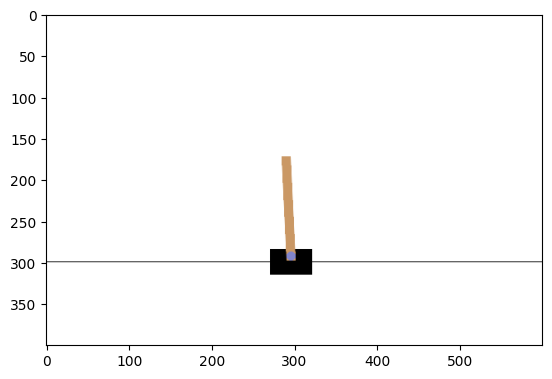

In [2]:
import gymnasium as gym
import numpy as np
import math
import matplotlib.pyplot as plt 

# Erstelle die Umgebung
env = gym.make('CartPole-v1',render_mode="rgb_array")
state=env.reset()
print("State="+str(state[0]))
plt.imshow(env.render())
plt.grid(False)

## State

Der State ist ein Arrays aus 4 Float Werten, diese entsprechen..

-[0] Cart Position (-4.8 bis +4.8)
-[1] Cart velocity (+/- unendlich)
-[2] Pole Angle (- 0.418 bis + 0.418)
-[3] Pole Angular Velocity (+/- unendlich)

Dieser kontinuierliche Zustandsraum muss in einen diskreten umgewandelt werden


In [3]:
n_actions =2
n_states = 30*30*30*30 # Festgelegt
q_table = np.zeros([n_states, n_actions])
q_table

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [4]:
cpos = np.array(np.linspace(-4.8,4.8,30))
cvelocity = np.array(np.linspace(-5,5,30))
cpolea = np.array(np.linspace(-0.418,0.418,30))
cpolev = np.array(np.linspace(-5,5,30))

def discret(s):
   # print (str(s))

    dsp = np.abs(cpos-s[0]).argmin()
    #print ("Der Wert für Card Position entspricht "+str(dsp))
    dsv = np.abs(cvelocity-s[1]).argmin()
    #print ("Der Wert für Card Velority entspricht "+str(dsv))
    dspa = np.abs(cpolea-s[2]).argmin()
    #print ("Der Wert für Pole Angle entspricht "+str(dspa))
    dspv = np.abs(cpolev-s[3]).argmin()
    #print ("Der Wert für Pole Velocity entspricht "+str(dspv))

    return dsp+dsv+dspa+dspv

nr=discret(state[0])
nr

57

# Q-Learning Algorithmus

In [22]:
# Definiere die Hyperparameter
total_episodes = 50000
learning_rate = 0.8
max_steps = 100
gamma = 0.95
epsilon = 1.0

for episode in range(total_episodes):
    state = env.reset()[0]

    done = False

    for step in range(max_steps):
        if np.random.uniform(0, 1) > epsilon:
            action = np.argmax(q_table[discret(state)])
        else:
            action = env.action_space.sample()

        new_state, reward, done, info,a = env.step(action)

        if done and step < max_steps - 1:
            reward = -300  # negative reward for falling
        #print("action:"+str(action)+" reward:"+str(reward))

        
        q_table[discret(state)][action] = (q_table[discret(state)][action] + 
                                  learning_rate * (reward + gamma * 
                                  np.max(q_table[discret(new_state)]) - q_table[discret(state)][action]))
        state = new_state

        #env.render()
        if done:
            break

    if episode%100==0:
        print ("Episode:"+str(episode))
    #epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)

q_table

Episode:0
Episode:100
Episode:200
Episode:300
Episode:400
Episode:500
Episode:600
Episode:700
Episode:800
Episode:900
Episode:1000
Episode:1100
Episode:1200
Episode:1300
Episode:1400
Episode:1500
Episode:1600
Episode:1700
Episode:1800
Episode:1900
Episode:2000
Episode:2100
Episode:2200
Episode:2300
Episode:2400
Episode:2500
Episode:2600
Episode:2700
Episode:2800
Episode:2900
Episode:3000
Episode:3100
Episode:3200
Episode:3300
Episode:3400
Episode:3500
Episode:3600
Episode:3700
Episode:3800
Episode:3900
Episode:4000
Episode:4100
Episode:4200
Episode:4300
Episode:4400
Episode:4500
Episode:4600
Episode:4700
Episode:4800
Episode:4900
Episode:5000
Episode:5100
Episode:5200
Episode:5300
Episode:5400
Episode:5500
Episode:5600
Episode:5700
Episode:5800
Episode:5900
Episode:6000
Episode:6100
Episode:6200
Episode:6300
Episode:6400
Episode:6500
Episode:6600
Episode:6700
Episode:6800
Episode:6900
Episode:7000
Episode:7100
Episode:7200
Episode:7300
Episode:7400
Episode:7500
Episode:7600
Episode:770

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

Mit dem Modell "spielen"

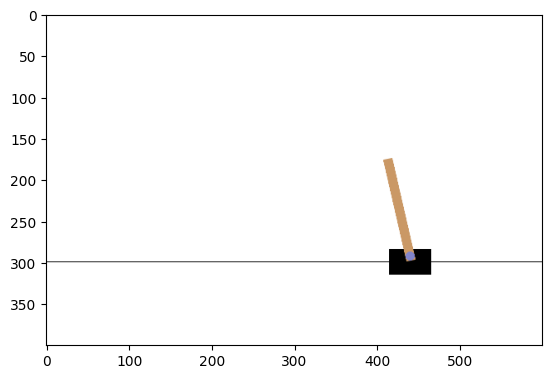

In [23]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

state = env.reset()[0]
img = plt.imshow(env.render()) # only call this once
done = False
while not done:
    action = np.argmax(q_table[discret(state)])
    new_state, reward, done, info,a = env.step(action)
    img.set_data(env.render()) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state = new_state
env.close()